# Evaluation of ECT filters 

This notebook is designed to evaluate optimized filters performance against a template image

The evaluation consists of following images:
 - Shrek image
 - 45 degree grid image
 - An image with black "text" in fg
 - An image with white "e" letter in fg
 - An full - white image
 - A white noise image
 - An image with white "1" number in fg  

In [2]:
# imports
import numpy as np
from ect.helpers import ECTEvaluator

# params
RADIUS = 200

### Definitions

Some helper fcn definitions and Evaluator object definition

In [3]:
def rms(x: np.ndarray) -> float:
    '''Root mean square of an array'''
    rms_ = np.sqrt((x*np.conj(x)).sum().sum())
    return rms_

def rmsnorm(x: np.ndarray) -> np.ndarray:
    '''Root mean square normalization of an array'''
    rms = np.sqrt((x*np.conj(x)).sum().sum())
    return x/rms

def absnorm(x):
    '''Absolute root mean square normalization of an array'''
    rms = np.sqrt((x*np.conj(x)).sum().sum())
    return np.abs(x)/rms

def snr(image: np.ndarray, template: np.ndarray):
    '''Signal to noise ratio - by root mean square normalization'''
    snr_lin = (1/rms((rmsnorm(image) - rmsnorm(template))))
    return 20*np.log10(snr_lin)

def snr_abs(image, template):
    '''Signal to noise ratio - by absolute root mean square normalization'''
    abs_img = np.abs(rmsnorm(image))
    abs_temp = np.abs(rmsnorm(template))

    snr_ = (1/rms(abs_img - abs_temp))
    return 20*np.log10(snr_)

### Evaluation Results

#### Shrek

snr_abs = 31.38
snr = 29.25+0.00j


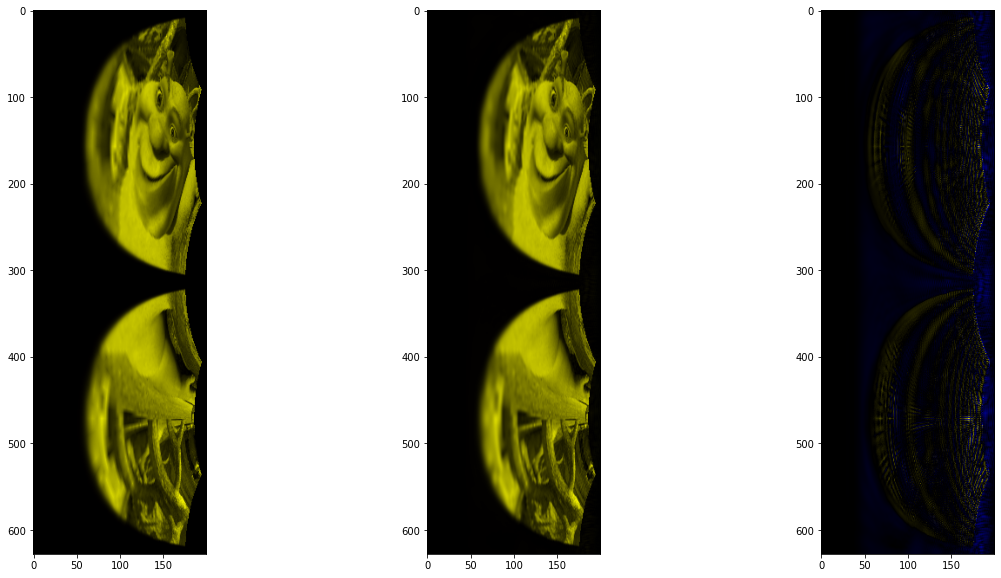

In [5]:
shrek = ECTEvaluator("../sample_imgs/shrek.png")

shrek.eval(snr_abs)
shrek.eval(snr)
shrek.show(absnorm)

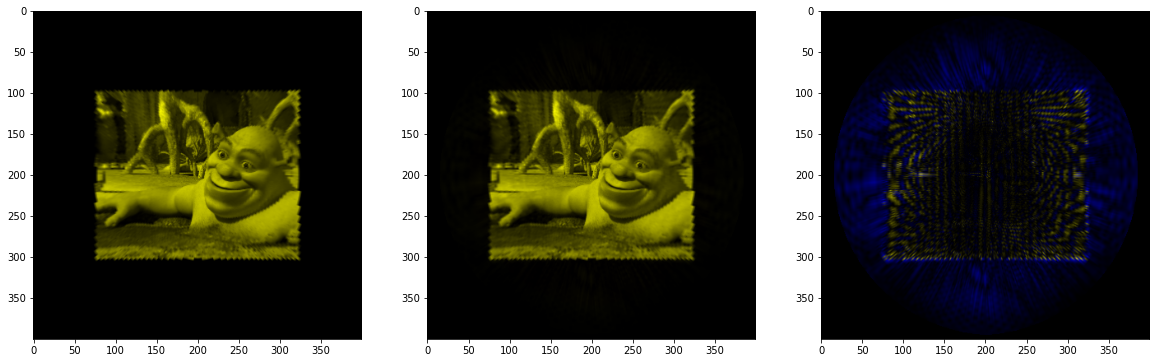

In [6]:
shrek.show_cart(absnorm)

#### 45 degree grid

snr = 20.16+0.00j
snr_abs = 21.01


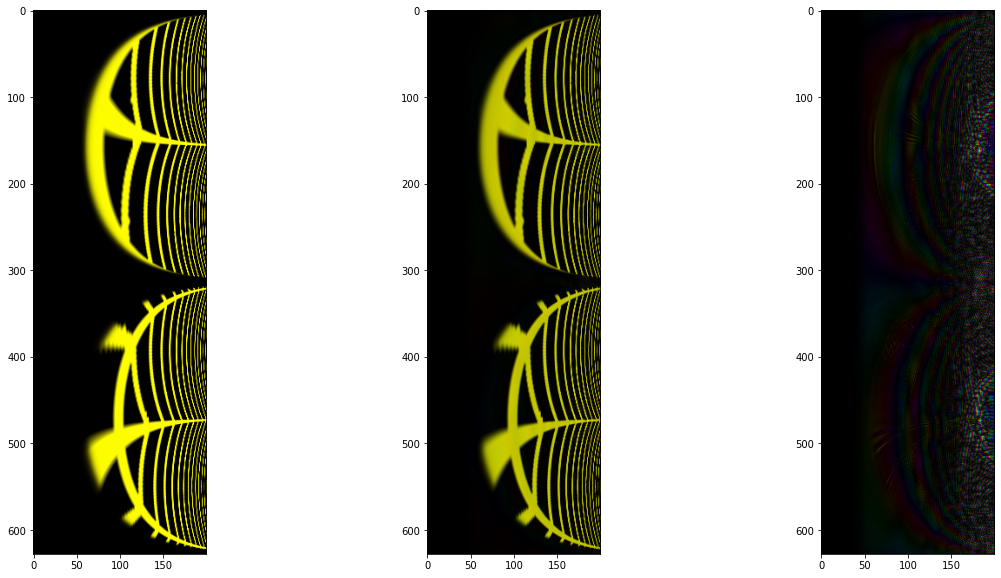

In [7]:
ruler = ECTEvaluator("../sample_imgs/ruler.png")

ruler.eval(snr)
ruler.eval(snr_abs)
ruler.show(rmsnorm)

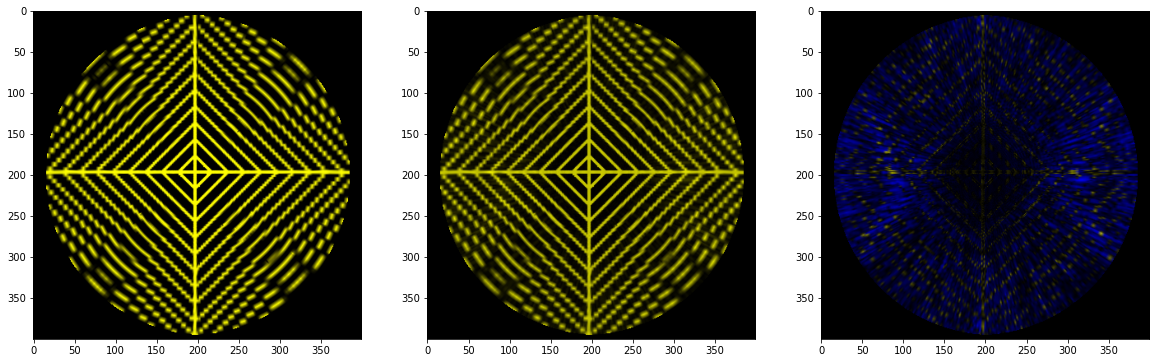

In [8]:
ruler.show_cart(absnorm)

#### "Text" image

snr = 27.03+0.00j
snr_abs = 28.53


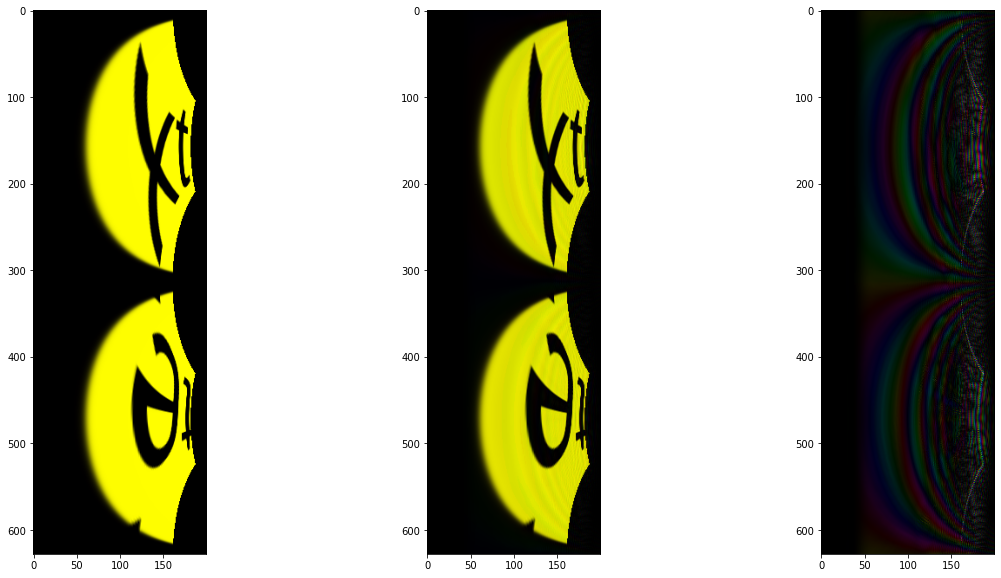

In [9]:
text = ECTEvaluator("../sample_imgs/text.png")

text.eval(snr)
text.eval(snr_abs)
text.show(rmsnorm)

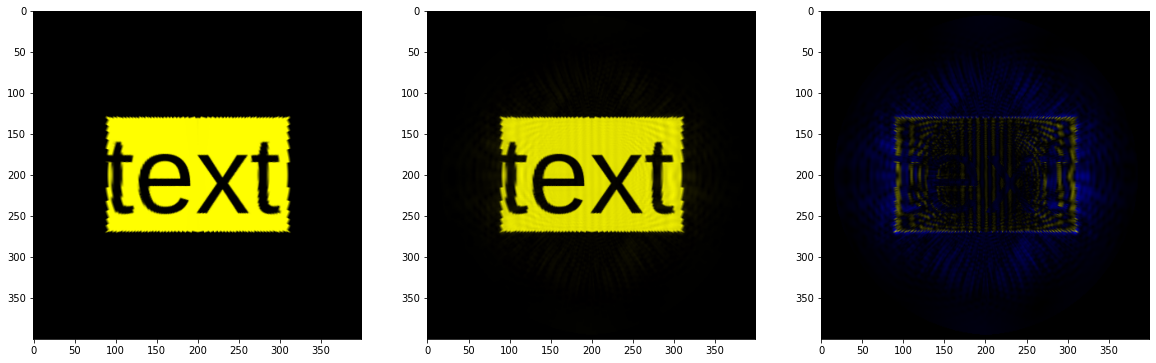

In [10]:
text.show_cart(absnorm)

#### "e" letter on black background

snr = 28.88+0.00j
snr_abs = 29.76


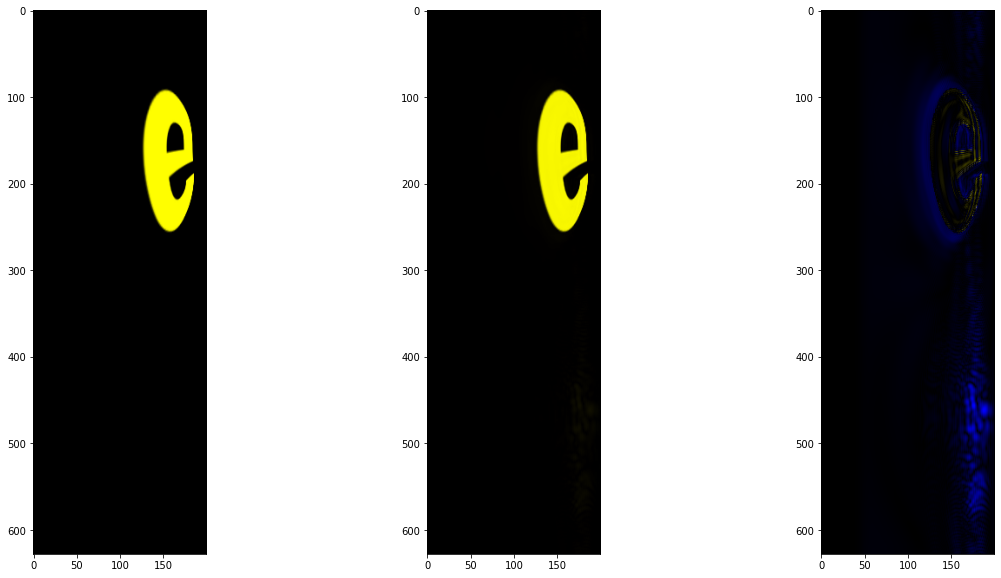

In [11]:
blacke = ECTEvaluator("../sample_imgs/black_e.png")

blacke.eval(snr)
blacke.eval(snr_abs)
blacke.show(absnorm)

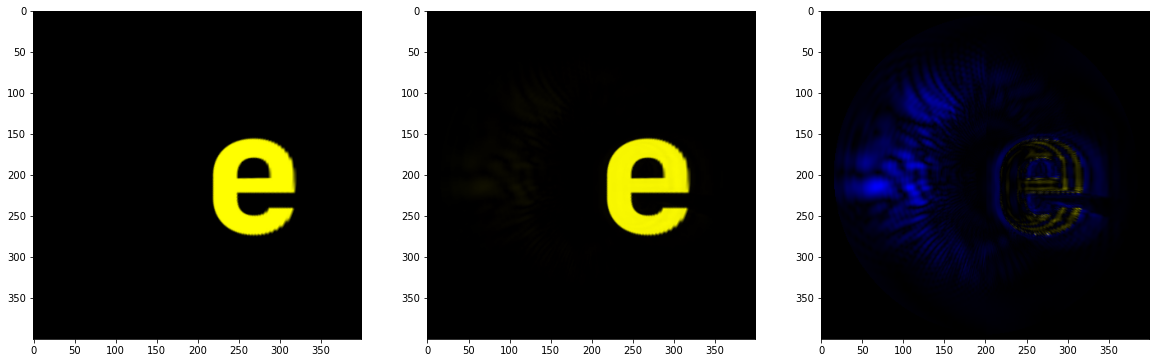

In [12]:
blacke.show_cart(absnorm)

#### Full white image

snr = 24.26+0.00j
snr_abs = 26.93


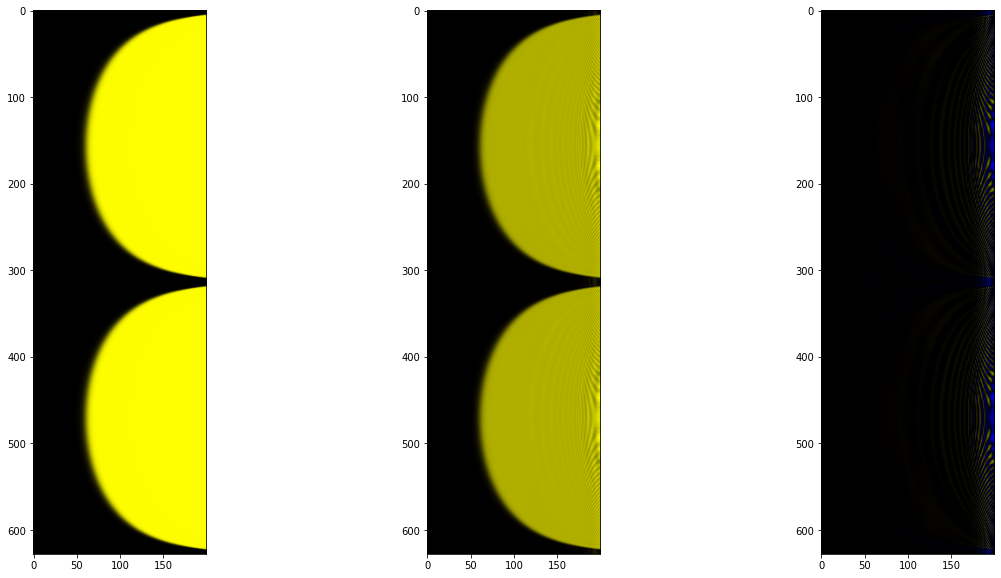

In [13]:
wedge = ECTEvaluator("../sample_imgs/white.png")

wedge.eval(snr)
wedge.eval(snr_abs)
wedge.show(absnorm)

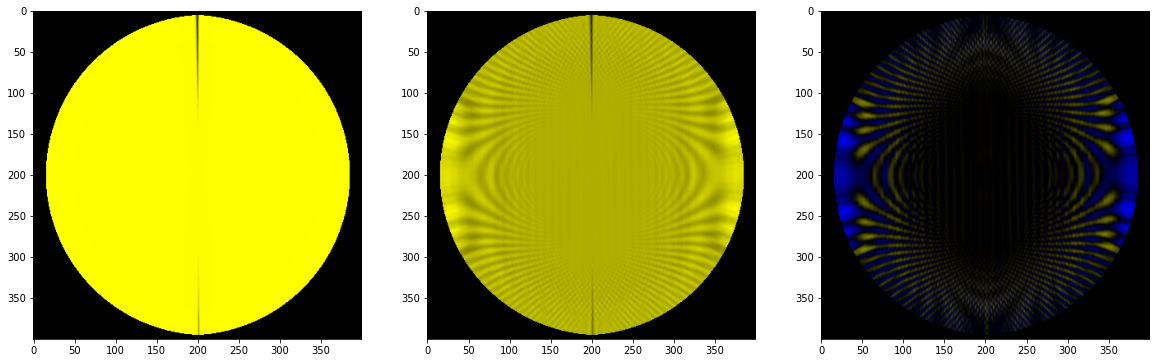

In [14]:
wedge.show_cart(absnorm)

#### White noise

snr = 18.84+0.00j
snr_abs = 20.88


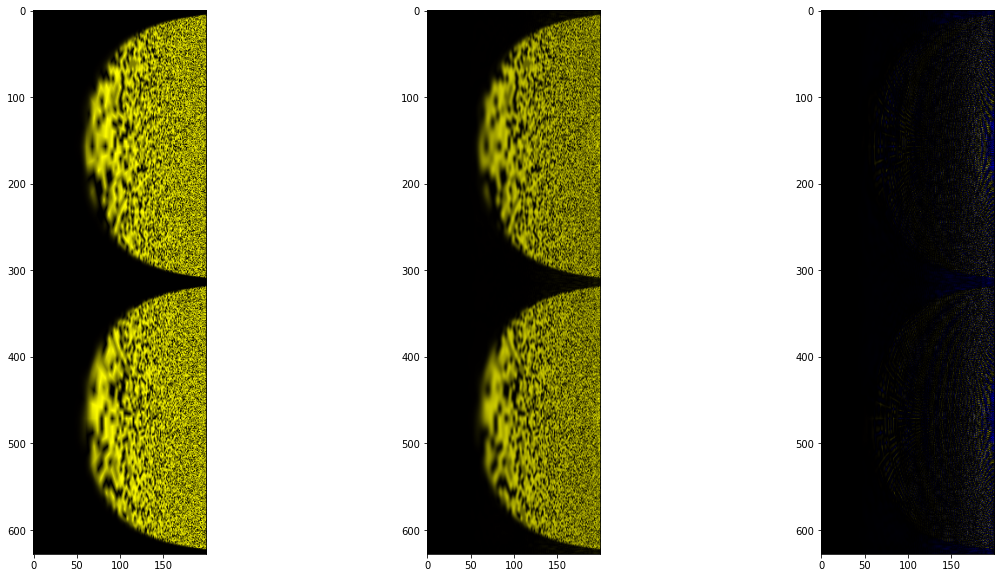

In [15]:
wnoise = ECTEvaluator("../sample_imgs/whitenoise.png")

wnoise.eval(snr)
wnoise.eval(snr_abs)
wnoise.show(absnorm)

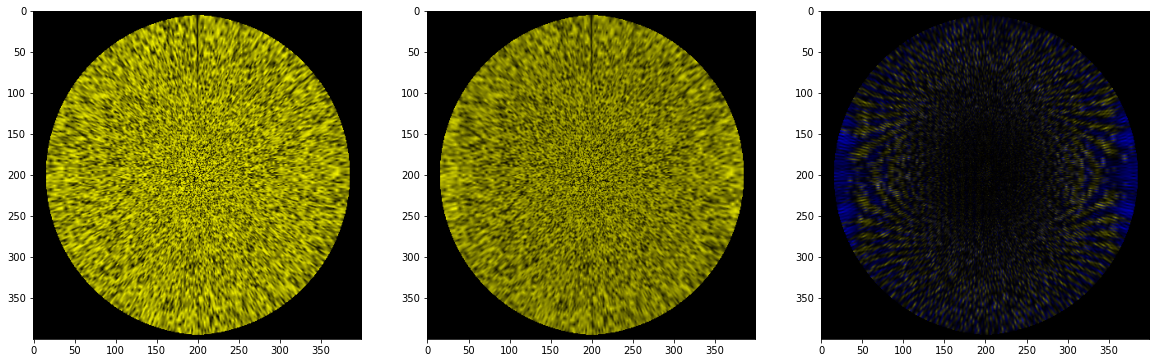

In [16]:
wnoise.show_cart(absnorm)

#### "1" digit on black background

snr = 26.38+0.00j
snr_abs = 26.87


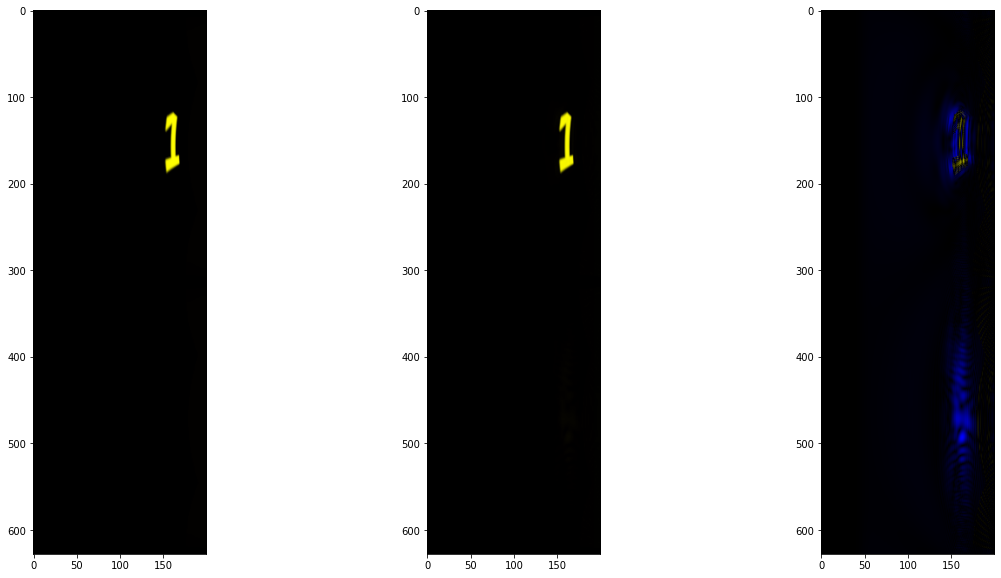

In [19]:
template = ECTEvaluator("../tracker_tests/1_scaled_50.png")

template.eval(snr)
template.eval(snr_abs)
template.show(absnorm)